objective - predict CO2 emissions (g/km)
Target variable - CO2 emissions (g/km)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

In [6]:
df = pd.read_csv('CO2 Emissions_Canada.csv')
df.sample(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
5185,MINI,COOPER CLUBMAN ALL4,MID-SIZE,1.5,3,M6,Z,10.5,7.4,9.1,31,214
329,DODGE,JOURNEY AWD,SUV - SMALL,3.6,6,A6,X,14.5,9.9,12.4,23,285
3714,FORD,MUSTANG CONVERTIBLE,SUBCOMPACT,2.3,4,M6,X,11.2,8.7,10.1,28,237
5080,MASERATI,GRANTURISMO,SUBCOMPACT,4.7,8,AS6,Z,18.2,11.4,15.1,19,355
2670,GMC,SIERRA 4WD,PICKUP TRUCK - STANDARD,5.3,8,A6,X,15.0,10.7,13.1,22,307


EDA 

In [7]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [8]:
print(df.isnull().sum())

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


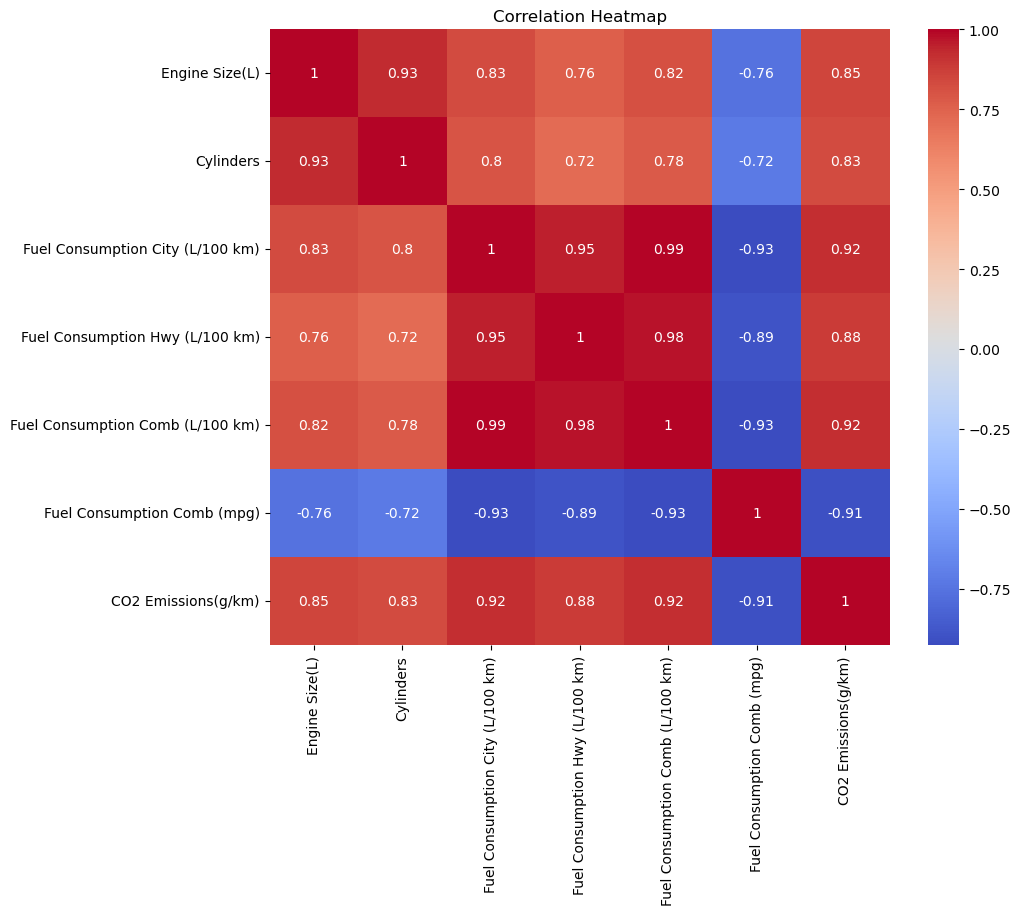

In [9]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


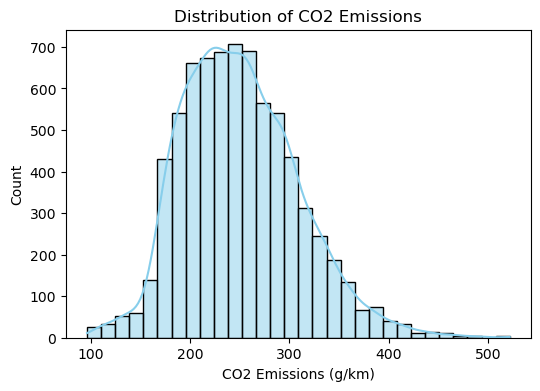

In [10]:
# Distribution of Target Variable
plt.figure(figsize=(6, 4))
sns.histplot(df['CO2 Emissions(g/km)'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of CO2 Emissions")
plt.xlabel("CO2 Emissions (g/km)")
plt.show()

Data Processing 

In [11]:
# renaming the columns
df.columns = df.columns.str.replace(" (L/100 km)", "").str.replace("(L)", "").str.replace("(g/km)", "").str.replace(" ", "_")
df.columns = df.columns.str.lower()
df.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb',
       'fuel_consumption_comb_(mpg)', 'co2_emissions'],
      dtype='object')

In [12]:
df.shape

(7385, 12)

In [13]:
df.duplicated().sum()
df = df.drop_duplicates(keep='first') # drop duplicated rows

In [14]:
df.shape

(6282, 12)

In [15]:
#encode transmission, fuel_type to numerical data
categorical_cols = ['transmission', 'fuel_type']
onehot_encoder=OneHotEncoder()
encoder=onehot_encoder.fit_transform(df[categorical_cols])
encoder

<6282x32 sparse matrix of type '<class 'numpy.float64'>'
	with 12564 stored elements in Compressed Sparse Row format>

In [16]:
encoded_feature_names = onehot_encoder.get_feature_names_out(categorical_cols)
encoded_feature_names

array(['transmission_A10', 'transmission_A4', 'transmission_A5',
       'transmission_A6', 'transmission_A7', 'transmission_A8',
       'transmission_A9', 'transmission_AM5', 'transmission_AM6',
       'transmission_AM7', 'transmission_AM8', 'transmission_AM9',
       'transmission_AS10', 'transmission_AS4', 'transmission_AS5',
       'transmission_AS6', 'transmission_AS7', 'transmission_AS8',
       'transmission_AS9', 'transmission_AV', 'transmission_AV10',
       'transmission_AV6', 'transmission_AV7', 'transmission_AV8',
       'transmission_M5', 'transmission_M6', 'transmission_M7',
       'fuel_type_D', 'fuel_type_E', 'fuel_type_N', 'fuel_type_X',
       'fuel_type_Z'], dtype=object)

In [3]:
encoded_df = pd.DataFrame(encoder, columns=encoded_feature_names)
encoded_df

NameError: name 'encoder' is not defined

In [ ]:
df=pd.concat([df.drop(categorical_cols,axis=1),encoded_df],axis=1)
df.head()

,make,model,vehicle_class,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb,fuel_consumption_comb_(mpg),co2_emissions,...,transmission_AV7,transmission_AV8,transmission_M5,transmission_M6,transmission_M7,fuel_type_D,fuel_type_E,fuel_type_N,fuel_type_X,fuel_type_Z
0,ACURA,ILX,COMPACT,2.0,4.0,9.9,6.7,8.5,33.0,196.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,ACURA,ILX,COMPACT,2.4,4.0,11.2,7.7,9.6,29.0,221.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,ACURA,ILX HYBRID,COMPACT,1.5,4.0,6.0,5.8,5.9,48.0,136.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6.0,12.7,9.1,11.1,25.0,255.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,ACURA,RDX AWD,SUV - SMALL,3.5,6.0,12.1,8.7,10.6,27.0,244.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7026 entries, 0 to 6263
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   make                         6282 non-null   object 
 1   model                        6282 non-null   object 
 2   vehicle_class                6282 non-null   object 
 3   engine_size                  6282 non-null   float64
 4   cylinders                    6282 non-null   float64
 5   fuel_consumption_city        6282 non-null   float64
 6   fuel_consumption_hwy         6282 non-null   float64
 7   fuel_consumption_comb        6282 non-null   float64
 8   fuel_consumption_comb_(mpg)  6282 non-null   float64
 9   co2_emissions                6282 non-null   float64
 10  transmission_A10             6282 non-null   float64
 11  transmission_A4              6282 non-null   float64
 12  transmission_A5              6282 non-null   float64
 13  transmission_A6        

In [ ]:
print(df.isnull().sum())


make                           744
model                          744
vehicle_class                  744
engine_size                    744
cylinders                      744
fuel_consumption_city          744
fuel_consumption_hwy           744
fuel_consumption_comb          744
fuel_consumption_comb_(mpg)    744
co2_emissions                  744
transmission_A10               744
transmission_A4                744
transmission_A5                744
transmission_A6                744
transmission_A7                744
transmission_A8                744
transmission_A9                744
transmission_AM5               744
transmission_AM6               744
transmission_AM7               744
transmission_AM8               744
transmission_AM9               744
transmission_AS10              744
transmission_AS4               744
transmission_AS5               744
transmission_AS6               744
transmission_AS7               744
transmission_AS8               744
transmission_AS9    

In [ ]:
df = df.dropna()

In [ ]:
# divide the data set 
X = df.drop(columns=['co2_emissions'])
X_numeric = X.select_dtypes(include=['number'])
y = df['co2_emissions']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, test_size=0.2, random_state=42)

Train Model 
1. LinearRegression 

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\n--- Model Evaluation ---")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared Score (R²):", r2)


--- Model Evaluation ---
Mean Absolute Error (MAE): 11.940903885570549
Mean Squared Error (MSE): 343.0476076358302
R-squared Score (R²): 0.9046186108243239


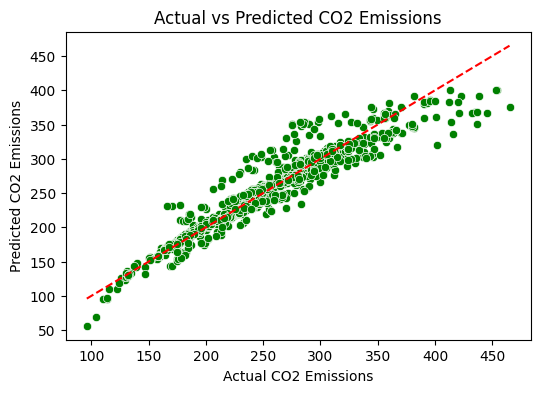

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual CO2 Emissions")
plt.ylabel("Predicted CO2 Emissions")
plt.title("Actual vs Predicted CO2 Emissions")
plt.show()